# Predictiong model testing on Dwelling dataset

In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [87]:
def prep_data():
    data = pd.read_csv('Dwelling_modelling_final.csv',index_col= 'year',parse_dates=True)
    print('Original Data: ')
    print(data.head(2))
    data = data.drop(['Unnamed: 0'], axis =1)
    data.index = pd.to_datetime(data.index,format=('%Y'),exact ='False')
    print('Completed Data: ')
    print(data.head(2))
    return data


In [89]:
data = prep_data()

Original Data: 
            Unnamed: 0 clue_small_area  Total_Dwelling
year                                                  
2002-01-01           0         Carlton              47
2003-01-01           1         Carlton             754
Completed Data: 
           clue_small_area  Total_Dwelling
year                                      
2002-01-01         Carlton              47
2003-01-01         Carlton             754


### Need to place this into a function later on
Using ARIMA for timeseries

In [78]:
def setting_data(data, column_):
        dataC = data.loc[(data['clue_small_area']==column_)].iloc[:,-1].reset_index(drop=False)
        dataC.index= dataC.year
        dataC = dataC.drop(columns ='year')
        dataC['Total_Dwelling'].plot()
        plt.title('Graph for site: '+column_)
        return dataC

# Evaluating the data with the ARIMA model

In [54]:
def evaluate_model(data):
    dftest= adfuller(data['Total_Dwelling'], autolag = 'AIC')
    print('1. ADF :', dftest[0])
    print('2. P-Value: ', dftest[1])
    print('3. Num Of Lags: ', dftest[2])
    print('4. Num of observations used: ', dftest[3])
    for key, val in dftest[4].items():
        print("\t",key , ': ', val)

In [19]:
evaluate_model(dataC['Total_Dwelling'])

1. ADF : -8.693174498452207
2. P-Value:  3.989507411821339e-14
3. Num Of Lags:  1
4. Num of observations used:  17
	 1% :  -3.889265672705068
	 5% :  -3.0543579727254224
	 10% :  -2.66698384083045


# Checking best Model parameter for dataset

In [58]:
def find_parameter(data):
    check = auto_arima(data['Total_Dwelling'],trace=True, suppress_warnings=True)
    check.summary()

# Applying the recommended parameters for the model.
- Providing a view of the predicted records and the testing records
- Graph the actual dataset with the predicted records

In [116]:
def arima_model(data, order_,test_,trend_offset_,trend_,training_):
    '''
        Function is used to feed the ARIMA model with a dataset as data,
        The order is used to tune the model.
        The Training_ is the number of training set - the model is very volatile with particular numbers
        Trend has various inputs such as ‘c’ for constant and ‘t’ for time series.
        Trend offset is also used to tune the model.
        Test provides the timeseries prediction, as current the model is predicting according to the length of the test dataset. The test_ variable provides further prediction pass the last data from the test dataset.
        The test dataset is used to graph along with the predictive dataset. This is done so we can access the model.
        The function also returns the mean squared error for the model.
        

    '''
    warnings.filterwarnings('ignore')
    # Setting up the training and testing data
    train = data.iloc[:training_]
    test = data.iloc[training_:]
    
    # Starting working on the model
    model = ARIMA(train['Total_Dwelling'],order=order_,trend = trend_, trend_offset =trend_offset_)
    model = model.fit()
    
    # Setting the start and end data for prediction
    start =len(train)
    end =len(train)+len(test)-1
    
    # Predicting the model
    pred=model.predict(start=start,end=(end+test_), typ='levels')
    print(pred)
    
    #Testing the model without out of bound prediction
    if test_ == 0:
        print('The mean sqaured error is: ',sqrt(mean_squared_error(pred,test['Total_Dwelling'])))
   
    #Plotting the values
    pred.plot(legend=True)
    test['Total_Dwelling'].plot(legend=True)
    plt.title('Training outcome')
    plt.show()
    
    
    plt.title('Predictive Model')
    #pred.plot(legend=True)
    #train.plot(legend=True)
    plt.plot(data['Total_Dwelling'],  label = "Actual") 
    plt.plot(test['Total_Dwelling'], label ='Actual predictive')
    plt.plot(pred, label = "Previctive") 
    plt.legend() 
    plt.show()
    
#arima_model(dataC,(0,0,0),0,80,'t')  

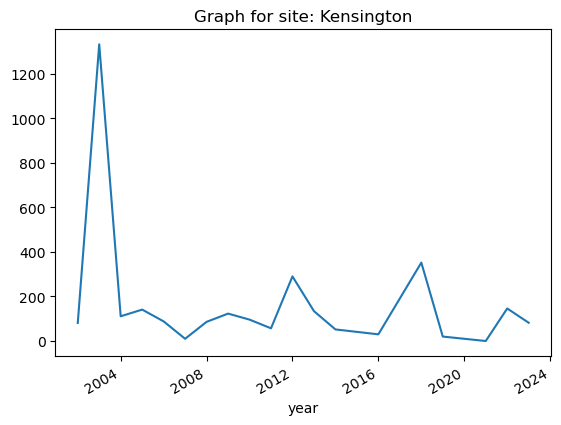

In [164]:
dataK = setting_data(data, 'Kensington')

In [165]:
evaluate_model(dataK)

1. ADF : -8.693174498452207
2. P-Value:  3.989507411821339e-14
3. Num Of Lags:  1
4. Num of observations used:  17
	 1% :  -3.889265672705068
	 5% :  -3.0543579727254224
	 10% :  -2.66698384083045


In [166]:
find_parameter(dataK)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.972, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=274.820, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=274.813, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.692, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.334 seconds


2014-01-01    31.563059
2015-01-01    33.990987
2016-01-01    36.418915
2017-01-01    38.846842
2018-01-01    41.274770
2019-01-01    43.702698
2020-01-01    46.130625
2021-01-01    48.558553
2022-01-01    50.986481
2023-01-01    53.414408
2024-01-01    55.842336
Freq: AS-JAN, Name: predicted_mean, dtype: float64


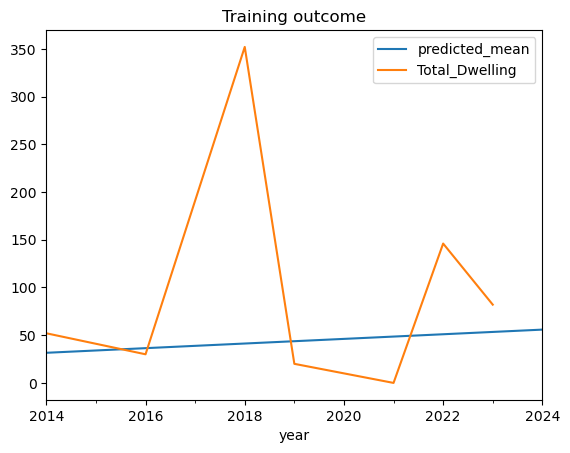

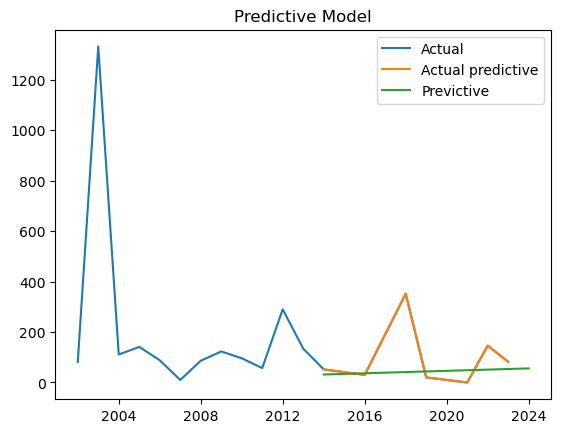

In [167]:
arima_model(dataK,(0,0,0),4,80,'t',-7)

# Modelling Carlton

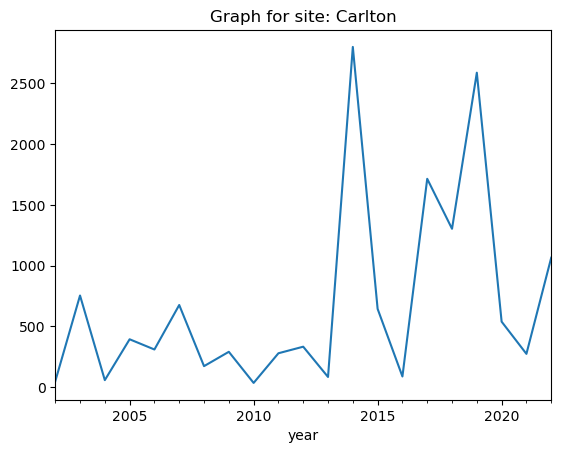

In [211]:
dataW = setting_data(data, 'Carlton')

In [212]:
evaluate_model(dataW)

1. ADF : -4.029846483784682
2. P-Value:  0.0012620423065391878
3. Num Of Lags:  0
4. Num of observations used:  20
	 1% :  -3.8092091249999998
	 5% :  -3.0216450000000004
	 10% :  -2.6507125


In [213]:
find_parameter(dataW)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=343.226, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=345.170, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=345.181, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.336, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=347.144, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.281 seconds


2020-01-01     845.847841
2021-01-01     466.617584
2022-01-01    1071.827213
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The mean sqaured error is:  209.20782473331377


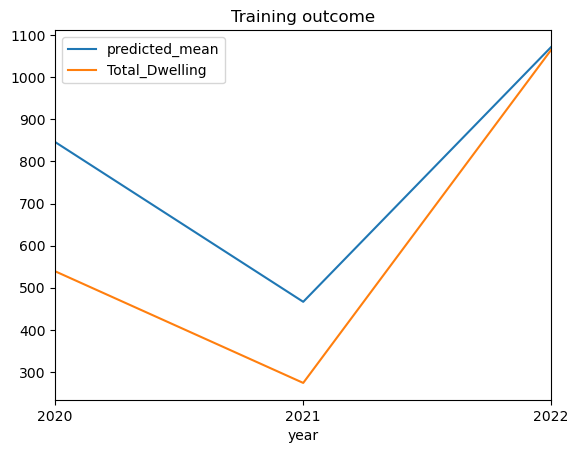

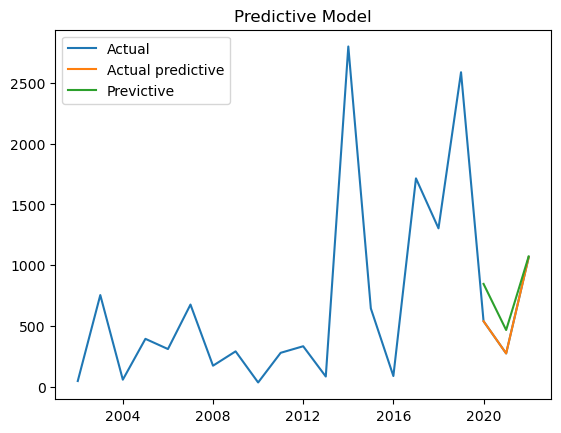

In [220]:
arima_model(dataW,(1,0,2),0,10,'t',-3)

# Modelling Southbank

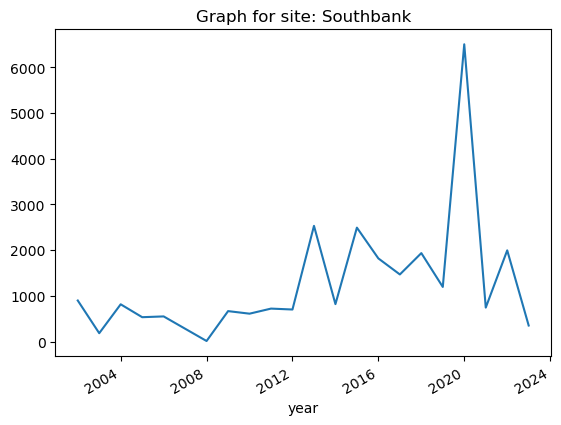

In [222]:
dataS= setting_data(data, 'Southbank')

In [223]:
evaluate_model(dataS)

1. ADF : -1.4854162274940377
2. P-Value:  0.540712992190068
3. Num Of Lags:  8
4. Num of observations used:  12
	 1% :  -4.137829282407408
	 5% :  -3.1549724074074077
	 10% :  -2.7144769444444443


In [224]:
find_parameter(dataS)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=371.965, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=366.541, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=368.556, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=368.537, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=378.378, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=370.529, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.241 seconds


18    1372.826478
19    1255.618068
20    1156.828988
Name: predicted_mean, dtype: float64
The mean sqaured error is:  728.9542598150015


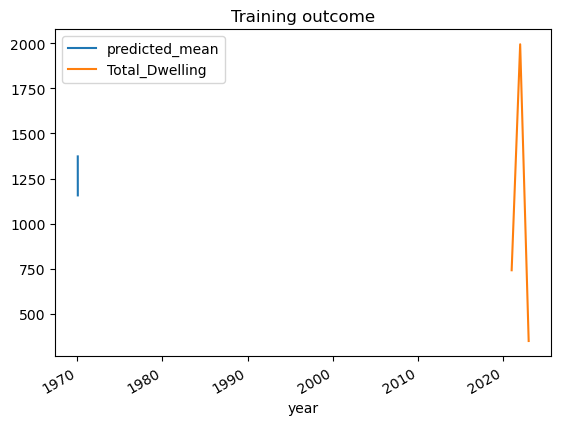

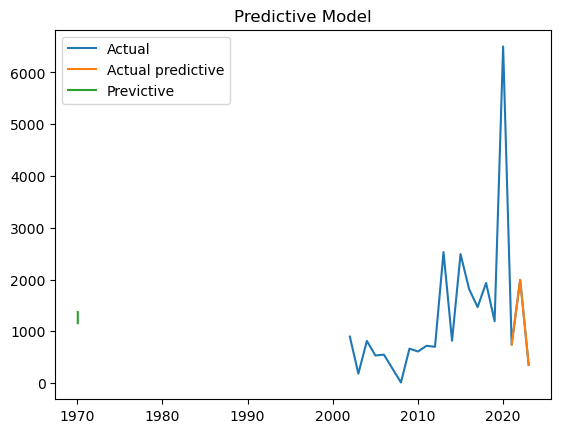

In [228]:
arima_model(dataS,(1,0,1),0,80,'t',-3)

# Conclusion
The Model prediction at is satisfactorily accurate on some dataset. For instance, the prediction for Carlton and Kensington, unfortunately for dataset such as Southbank does not work. This might be due to the erratic graph.
Further requirement for this project is to automate the testing and optimisation of the model.


Reference:
   - https://www.youtube.com/watch?v=8FCDpFhd1zk&t=330s
   - https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
   - https://www.youtube.com/watch?v=8FCDpFhd1zk&t=419s